# Proyecto 2: Buscaminas
### Estudiantes: Diana Valentina Caro & Paula Lorena López.

In [1]:
from buscaminas import *
import numpy as np
from itertools import combinations
from logica import *

Definimos el objeto de Buscaminas inicial como `bs`.

In [2]:
bs = Buscaminas()

## Definición de reglas de manera informal

Al ejecutar un buscaminas, se debe considerar primero la ubicación en donde se encuentra la casilla que estamos considerando. Es decir, la ubicación de la casilla nos proveerá los posibles movimientos dependiendo del valor del que estemos hablando. 


Esto se hace con el fin de despejar las casillas en las que no hay bombas y encontar en cuales están las bombas.

De esta manera, consideremos el tablero de un buscaminas báscia $8\times8$.
Podemos evidenciar el tablero en la siguiente matriz.

Cada posición de la matriz es correspondiente a cada casilla del buscaminas. El valor que tiene cada posición de la matriz, corresponde a la cantidad de adyacentes que tiene. Es decir, el valor corresponde a la cantidad máxima que puede tener esa casilla. 

In [3]:
tablero = np.zeros((8,8))
sz = 8
u = sz-1
for x in range(sz):
    for y in range(sz):
        if (x==0 and y==0) or (x==0 and y==u) or (x==u and y==0) or (x==u and y==u):
            tablero[x,y] = 3
        elif (x==0 and (y!=0 or y!=u)) or (x==u and (y!=0 or y!=u)) or (y==0 and (x!=0 and x!=u)) or (y==u and (x!=0 or x!=u)):
            tablero[x,y] = 5
        else:
            tablero[x,y] = 8

tablero

array([[3., 5., 5., 5., 5., 5., 5., 3.],
       [5., 8., 8., 8., 8., 8., 8., 5.],
       [5., 8., 8., 8., 8., 8., 8., 5.],
       [5., 8., 8., 8., 8., 8., 8., 5.],
       [5., 8., 8., 8., 8., 8., 8., 5.],
       [5., 8., 8., 8., 8., 8., 8., 5.],
       [5., 8., 8., 8., 8., 8., 8., 5.],
       [3., 5., 5., 5., 5., 5., 5., 3.]])

Sin embargo, lo que determina la cantidad de bombas que hay es el valor que tiene la casilla. Es decir, si la casilla tiene el número 2, dentro del grupo de sus adyacentes hay 2 casillas con bombas. 

De esta manera, creamos la primera regla: 
* Si la casilla (x, y) tiene n minas alrededor, entonces en las casillas adyacentes $c_1, ..., c_n$  hay bombas.

Para una mejor explicación, se creó una función que recibe como parámetro una coordenada de una casilla cualquiera.
Esta considera el valor que tiene y retorna las ubicaciones en términos coordernadas de las posibles minas.

In [4]:
def options(x, y):
    num = bs.tablero[x][y].valor
    if num == -1:
        print(f'En ({x}, {y}) está la mina')
    elif num == 0:
        print(f'En ({x}, {y}) es seguro')
    else:
        """esquinas"""
        lst = []
        if (x==0 and y==0):
            acciones = [(x+1,y), (x+1, y+1), (x, y+1)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')
        elif (x==0 and y==u):
            acciones = [(x, y-1), (x+1, y-1), (x+1, y+1)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')
        elif (x==u and y==0):
            acciones = [(x-1, y), (x-1, y+1), (x, y+1)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')
        elif (x==u and y==u):
            acciones = [(x,y-1), (x-1, y-1), (x-1, y)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')
        elif (x==0 and (y!=0 or y!=u)):
            acciones = [(x, y-1), (x-1, y-1), (x-1,y), (x-1, y+1), (x, y+1)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')
#            bordes
        elif (x==u and (y!=0 or y!=u)):
            acciones = [(x, y-1), (x+1, y-1), (x+1,y), (x+1, y+1), (x, y+1)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')
        elif (y==0 and (x!=0 and x!=u)):
            acciones = [(x-1, y), (x-1, y+1), (x,y+1), (x+1, y+1), (x+1, y)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')
        elif (y==u and (x!=0 or x!=u)):
            acciones = [(x-1, y), (x-1, y-1), (x,y-1), (x+1, y-1), (x+1, y)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')
        else:
            acciones = [(x-1,y-1), (x-1, y), (x-1, y+1), (x, y+1), (x+1, y+1), (x+1, y), (x+1, y-1), (x+1, y-1)]
            temp = combinations(acciones, num)
            for i in list(temp):
                lst.append(i)
            print(f'Para la casilla ({x}, {y}) hay {num} minas. Los posibles lugares donde pueden estar son en {lst}')

<Axes:>

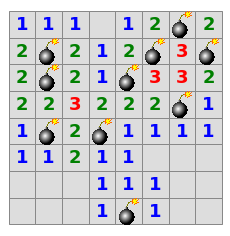

In [5]:
bs.pintar_todo()

In [7]:
options(2,2)

Para la casilla (2, 2) hay 2 minas. Los posibles lugares donde pueden estar son en [((1, 1), (1, 2)), ((1, 1), (1, 3)), ((1, 1), (2, 3)), ((1, 1), (3, 3)), ((1, 1), (3, 2)), ((1, 1), (3, 1)), ((1, 1), (3, 1)), ((1, 2), (1, 3)), ((1, 2), (2, 3)), ((1, 2), (3, 3)), ((1, 2), (3, 2)), ((1, 2), (3, 1)), ((1, 2), (3, 1)), ((1, 3), (2, 3)), ((1, 3), (3, 3)), ((1, 3), (3, 2)), ((1, 3), (3, 1)), ((1, 3), (3, 1)), ((2, 3), (3, 3)), ((2, 3), (3, 2)), ((2, 3), (3, 1)), ((2, 3), (3, 1)), ((3, 3), (3, 2)), ((3, 3), (3, 1)), ((3, 3), (3, 1)), ((3, 2), (3, 1)), ((3, 2), (3, 1)), ((3, 1), (3, 1))]


In [10]:
options(7,6)

En (7, 6) está la mina


In [9]:
options(0,0)

En (0, 0) es seguro


## Formalizar las reglas

Definiremos las reglas por medio de lógica proposicional para generalizarlas y así indicar como proceder frente a cada movimiento. 

Luego, así como se vio anteriormente, a lo sumo una casilla puede tener 8 minas. 

Y el valor de la casilla corresponderá al número de minas adyacentes.  Por ejemplo, consideremos el siguiente ejemplo:

In [13]:
options(1,7)

Para la casilla (1, 7) hay 1 minas. Los posibles lugares donde pueden estar son en [((0, 7),), ((0, 6),), ((1, 6),), ((2, 6),), ((2, 7),)]


Luego, para la casilla $(0,7)$ (esquina superior izquierda) contiene una mina. Ahora bien, esto conlleva a que la mina puede estar en la casilla $(0,6)$, $(1,6)$, $(2,6)$, $(2,7)$ o $(0,7)$. Sin embargo, note lo siguiente:

- Si hay una mina en $(1,7)$ pero no hay mina en $(0,6)$ ni en $(1,6)$ ni en $(2,6)$ ni en $(2,7)$ entonces está en $(0,7)$.

- Si hay una mina en $(1,7)$ pero no hay mina en $(0,7)$ ni en $(1,6)$ ni en $(2,6)$ ni en $(2,7)$ entonces está en $(0,6)$.

- Si hay una mina en $(1,7)$ pero no hay mina en $(0,7)$ ni en $(0,6)$ ni en $(2,6)$ ni en $(2,7)$ entonces está en $(1,6)$.

- Si hay una mina en $(1,7)$ pero no hay mina en $(0,7)$ ni en $(0,6)$ ni en $(1,6)$ ni en $(2,7)$ entonces está en $(2,6)$.

De otra manera podemos decir que si la casilla tiene el número y sabemos donde están las minas correspondientes, entonces los restantes será espacios seguros. Observe:

- Si hay una mina en $(1,7)$ y hay mina en $(0,6)$, entonces en el resto no habrá.

Para formalizar esto, se implementarán las reglas en las siguientes funciones:

In [14]:
num_filas = len([str(i) for i in range(sz)])
num_column = len([str(i) for i in range(sz)])
num_info = 9
IenCasilla = Descriptor([num_column, num_filas, num_info])

In [22]:
def espacio_seguro_formula(n, size):
    formulas = []
    casillas = []
    for x in range(size):
        for y in range(size):
            casillas.append((x,y))
    for i in casillas:
        x, y = i
        ady = adyacentes(i, size)
        for j in combinations(ady, n):
            f = IenCasilla.P([x, y, n])
            distintas = []
            for k in ady:
                if k not in j:
                    distintas.append(k)
            for r, s in j:
                f += 'Y' + IenCasilla.P([r, s, 0])
            for r,s in distintas:
                formulas.append(f + '>-' + IenCasilla.P([r, s, 0]))
    return formulas

In [23]:
def hay_mina_formula(n , size):
    formulas = []
    casillas = []
    for x in range(size):
        for y in range(size):
            casillas.append((x,y))
    for i in casillas:
        x, y = i
        ady = adyacentes(i, size)
        for j in combinations(ady, n):
            f = IenCasilla.P([x, y, n])
            distintas = []
            for k in ady:
                if k not in j:
                    distintas.append(k)
            for r,s in distintas:
                f += 'Y-' + IenCasilla.P([r, s, 0])
            for r, s in j:
                formulas.append(f + '>' + IenCasilla.P([r, s, 0]))
    return formulas

In [24]:
def no_hay_mina_formula(n, size):
    formulas = []
    casillas = []
    for x in range(size):
        for y in range(size):
            casillas.append((x,y))
    for i in casillas:
        x, y = i
        formulas.append(IenCasilla.P([x, y, n]) + '>-' + IenCasilla.P([x, y, 0]))
    return formulas


<Axes:>

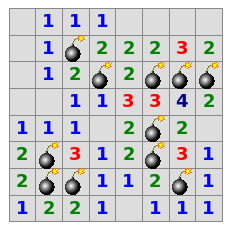

In [40]:
bs = Buscaminas()
bs.pintar_todo()

<Axes:>

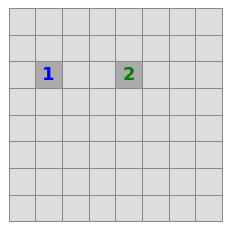

In [41]:
for _ in range(2):
    x = random.randint(0, sz-1)
    y = random.randint(0, sz-1)
    bs.transicion((x,y))
bs.pintar_casilla()

## Implementar el juego

In [42]:
class Agente:

    def __init__(self, bs, descriptor=None):
        self.bs = bs
        self.base = LPQuery([])
        self.desc = descriptor

    def perceptos(self):
        listreacc = []
        for x,y in self.bs.casillas:
            if self.bs.tablero[x][y].seleccionado:
                if self.bs.flags[x][y] == False:
                    if self.bs.tablero[x][y].valor == 0:
                        listreacc += ['-' + self.desc.P([x, y, 0])]
                    elif self.bs.tablero[x][y].valor == -1:
                        listreacc += [self.desc.P([x, y, 0])]
                    else:
                        listreacc += [self.desc.P([x, y, self.bs.tablero[x][y].valor])]
                elif self.bs.flags[x][y]:
                    listreacc += [self.desc.P([x, y, 0])]
        listreacc = 'Y'.join(listreacc)
        return listreacc

In [43]:
formula_segura1 = espacio_seguro_formula(0, 8)
formula_segura2 = espacio_seguro_formula(1, 8)
formula_segura3 = espacio_seguro_formula(2, 8)
formula_segura4 = espacio_seguro_formula(3, 8)
formula_segura5 = espacio_seguro_formula(4, 8)
formula_segura6 = espacio_seguro_formula(5, 8)
formula_segura7 = espacio_seguro_formula(6, 8)
formula_segura8 = espacio_seguro_formula(7, 8)

In [44]:
formula_mina1 = hay_mina_formula(0, 8) 
formula_mina2 = hay_mina_formula(1, 8) 
formula_mina3 = hay_mina_formula(2, 8)
formula_mina4 = hay_mina_formula(3, 8) 
formula_mina5 = hay_mina_formula(4, 8)
formula_mina6 = hay_mina_formula(5, 8) 
formula_mina7 = hay_mina_formula(6, 8)
formula_mina8 = hay_mina_formula(7, 8)

In [45]:
formula_nomina1 = no_hay_mina_formula(0, 8)
formula_nomina2 = no_hay_mina_formula(1, 8)
formula_nomina3 = no_hay_mina_formula(2, 8)
formula_nomina4 = no_hay_mina_formula(3, 8)
formula_nomina5 = no_hay_mina_formula(4, 8)
formula_nomina6 = no_hay_mina_formula(5, 8)
formula_nomina7 = no_hay_mina_formula(6, 8)
formula_nomina8 = no_hay_mina_formula(7, 8)

In [46]:
agent = Agente(bs, descriptor=IenCasilla)
agent.base = LPQuery(formula_segura1 + formula_segura2 + formula_segura3 + formula_segura4 + formula_segura5\
                 + formula_segura6 + formula_segura7 + formula_segura8 + formula_mina1 + formula_mina2\
                 + formula_mina3 + formula_mina4 + formula_mina5 + formula_mina6 + formula_mina7 + formula_mina8\
                 + formula_nomina1 + formula_nomina2 + formula_nomina3 + formula_nomina4 + formula_nomina5\
                 + formula_nomina6 + formula_nomina7 + formula_nomina8)

In [47]:
perc = agent.perceptos()
agent.base.TELL(perc)

In [48]:
atoms = []
for i in range(sz):
    for j in range(sz):
        for v in range(sz+1):
            atoms.append(agent.desc.P([i, j, v]))
            atoms.append('-' + agent.desc.P([i, j, v]))
agent.base.atomos = atoms

In [56]:
def ASK(objetivo, valor, base, algoritmo):
    if algoritmo == 'Forward chaining':
        ask = pl_fc_entails(base, objetivo)
        return ask

In [58]:
casillas = [(x,y) for x in range(sz) for y in range(sz)]
for i in casillas:
    x, y = i
    if bs.tablero[x][y].seleccionado == False:
        objetivomina = '-' + agent.desc.P([x,y,0])
        seguro = agent.desc.P([x,y,0])
        ask1 = ASK(seguro, 'success', agent.base, 'Forward chaining')
        ask2 = ASK(objetivomina, 'success', agent.base, 'Forward chaining')
        if ask1:
            bs.agregar_quitar_bandera(i)
        elif ask2:
            bs.transicion(i)
bs.pintar_casilla()

El juego ha terminado.
El juego ha terminado.
El juego ha terminado.


<Axes:>

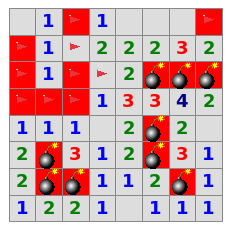

In [59]:
bs.pintar_todo()